## Analise aluguel de bicicletas

In [1]:
# importação de bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline



In [2]:
#leitura e analise dos dados
df= pd.read_csv('bike_sharing_daily.csv')
df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [3]:
# Verificando a correlação entre as variaveis

df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"),axis=1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.0,0.41,0.87,0.5,0.016,-1.6e-05,-0.0043,-0.021,0.15,0.15,0.016,-0.11,0.28,0.66,0.63
season,0.41,1.0,-0.0018,0.83,-0.011,-0.0031,0.012,0.019,0.33,0.34,0.21,-0.23,0.21,0.41,0.41
yr,0.87,-0.0018,1.0,-0.0018,0.008,-0.0055,-0.002,-0.049,0.048,0.046,-0.11,-0.012,0.25,0.59,0.57
mnth,0.5,0.83,-0.0018,1.0,0.019,0.0095,-0.0059,0.044,0.22,0.23,0.22,-0.21,0.12,0.29,0.28
holiday,0.016,-0.011,0.008,0.019,1.0,-0.1,-0.25,-0.035,-0.029,-0.033,-0.016,0.0063,0.054,-0.11,-0.068
weekday,-1.6e-05,-0.0031,-0.0055,0.0095,-0.1,1.0,0.036,0.031,-0.00017,-0.0075,-0.052,0.014,0.06,0.057,0.067
workingday,-0.0043,0.012,-0.002,-0.0059,-0.25,0.036,1.0,0.061,0.053,0.052,0.024,-0.019,-0.52,0.3,0.061
weathersit,-0.021,0.019,-0.049,0.044,-0.035,0.031,0.061,1.0,-0.12,-0.12,0.59,0.04,-0.25,-0.26,-0.3
temp,0.15,0.33,0.048,0.22,-0.029,-0.00017,0.053,-0.12,1.0,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.15,0.34,0.046,0.23,-0.033,-0.0075,0.052,-0.12,0.99,1.0,0.14,-0.18,0.54,0.54,0.63


In [4]:
#defininindo 80% do meu dataframe para treinamento e 20% para teste

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


In [5]:
#Definindo labels e features
X_train = train['temp']
Y_train= train['cnt']

#ajuste de shapes
x_matrix = X_train.values.reshape(-1,1)


In [6]:
#Treinamento e score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_matrix,Y_train)
reg.score(x_matrix,Y_train)

0.402046669922249

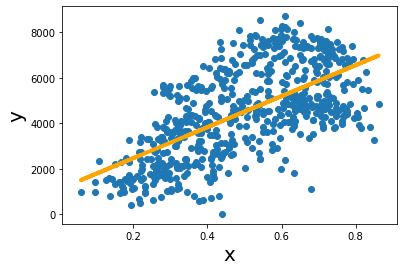

In [7]:
plt.scatter(X_train,Y_train)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(X_train,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.show()

In [8]:
# Definindo dados de teste

X_test = test['temp']
Y_test= test['cnt']

#ajuste de shapes
Y_matrix = X_test.values.reshape(-1,1)

In [9]:
# checando score das predições
reg.predict(Y_matrix)
reg.score(Y_matrix,Y_test)


0.3413804453224479

#### Tivemos overfitting dos dados. Tentaremos a abordagem de normalizar os dados para ver se consuimos resultados melhores

In [10]:
#Normalizando os dados
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(train[['temp']])
X_test = sc_X.transform(test[['temp']])
sc_y = StandardScaler()
y_train = sc_y.fit_transform(train[['cnt']])
y_test = sc_y.fit_transform(test[['cnt']])

In [11]:
#Treinamento e score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.402046669922249

In [12]:
# checando score das predições
reg.predict(X_test)
reg.score(X_test,y_test)


0.355037206861764

#### Mesmo com a normalização o modelo seguiu em overfitting, generalizando os dados. Na analise dos dados pode-se ver que eles iniciam -se bem agrupados e a reta passa a ser esparsos. Não foi possivel estabelecer boas previsões.